In [1]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("studentInfo.csv")

# Preview structure
print("Shape:", df.shape)
print(df.dtypes)

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill or drop missing values
df['imd_band'] = df['imd_band'].fillna('Unknown')
df['age_band'] = df['age_band'].fillna('Unknown')
df['disability'] = df['disability'].fillna('Unknown')

# Convert categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 
                    'age_band', 'disability', 'imd_band']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert target variable
df['final_result'] = le.fit_transform(df['final_result'])

print("\nCleaned dataset preview:")
print(df.head())

Shape: (32593, 12)
code_module             object
code_presentation       object
id_student               int64
gender                  object
region                  object
highest_education       object
imd_band                object
age_band                object
num_of_prev_attempts     int64
studied_credits          int64
disability              object
final_result            object
dtype: object

Missing Values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

Cleaned dataset preview:
   code_module  code_presentation  id_student  gender  region  \
0            0                  1       11391       1       0   
1            0                  1       28400       0       6

        code_module  code_presentation    id_student        gender  \
count  32593.000000       32593.000000  3.259300e+04  32593.000000   
mean       3.109349           1.786672  7.066877e+05      0.548431   
std        1.744620           1.070618  5.491673e+05      0.497657   
min        0.000000           0.000000  3.733000e+03      0.000000   
25%        1.000000           1.000000  5.085730e+05      0.000000   
50%        3.000000           2.000000  5.903100e+05      1.000000   
75%        5.000000           3.000000  6.444530e+05      1.000000   
max        6.000000           3.000000  2.716795e+06      1.000000   

             region  highest_education      imd_band      age_band  \
count  32593.000000       32593.000000  32593.000000  32593.000000   
mean       5.880097           1.022888      4.408861      0.302672   
std        3.688967           0.981401      2.960059      0.473628   
min        0.000000           0.000000      0.000000      0.000000   
25%        3.000000

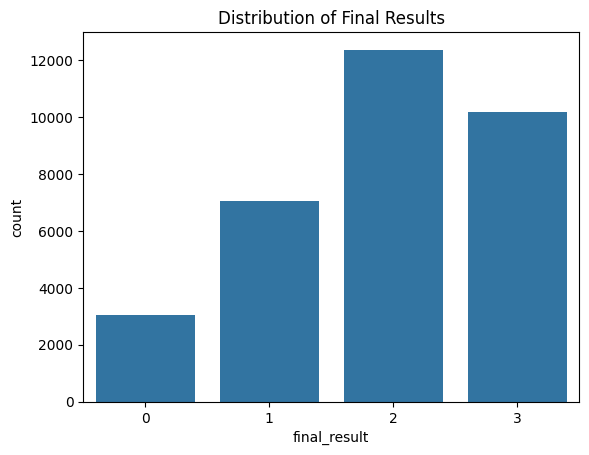

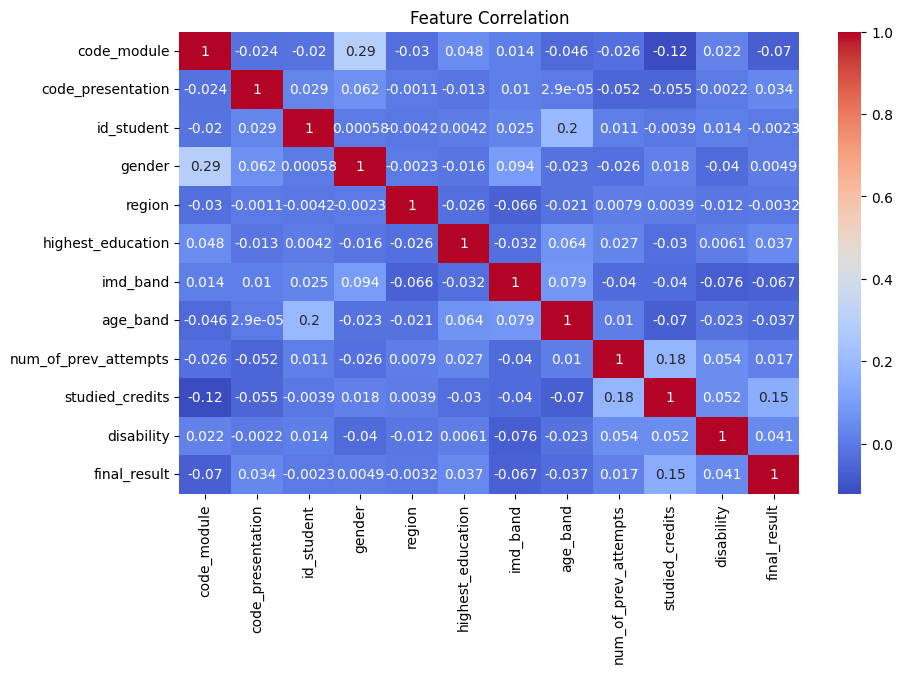

In [2]:
# Summary statistics
print(df.describe())

# Count plot of final result
sns.countplot(x='final_result', data=df)
plt.title("Distribution of Final Results")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and target
X = df.drop('final_result', axis=1)
y = df['final_result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [5]:
# Count of each class in the target
print(df['final_result'].value_counts(normalize=True))

final_result
2    0.379253
3    0.311601
1    0.216365
0    0.092781
Name: proportion, dtype: float64


Accuracy: 0.4054302807179015

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.07      0.10       593
           1       0.33      0.21      0.26      1495
           2       0.44      0.56      0.50      2458
           3       0.41      0.46      0.43      1973

    accuracy                           0.41      6519
   macro avg       0.34      0.32      0.32      6519
weighted avg       0.38      0.41      0.39      6519



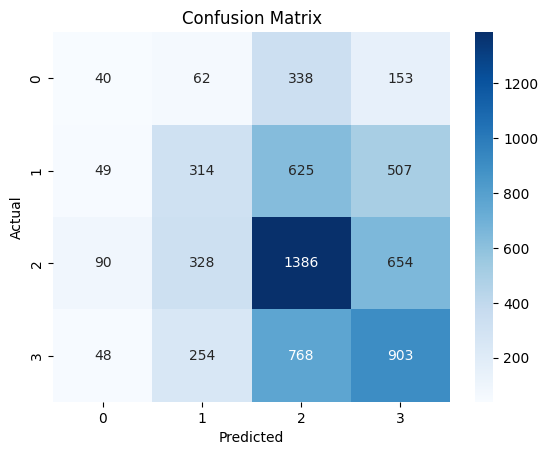

In [4]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def train_and_evaluate(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    # Train model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    print("✅ Model Evaluation Results:")
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return model


✅ Model Evaluation Results:

Accuracy: 0.40297591655161835

Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.08      0.11       593
           1       0.32      0.21      0.25      1495
           2       0.44      0.56      0.50      2458
           3       0.41      0.45      0.43      1973

    accuracy                           0.40      6519
   macro avg       0.34      0.32      0.32      6519
weighted avg       0.38      0.40      0.38      6519



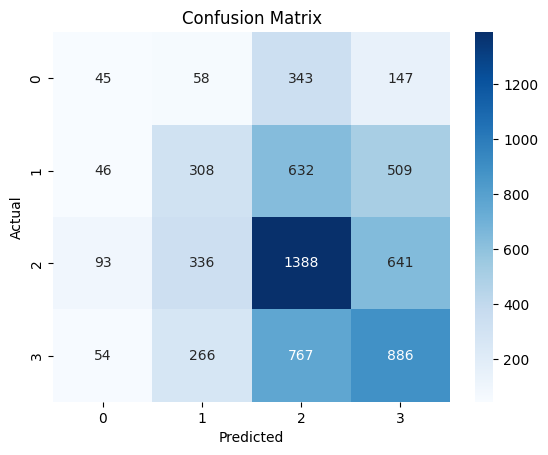

In [8]:
model = train_and_evaluate(X, y)
